In [47]:
import chromadb
from  hdbscan import HDBSCAN
import numpy as np

np.set_printoptions(threshold=4000)


In [2]:
client = chromadb.PersistentClient(path="data/books.db")
col = client.get_collection(name="books-multilingual-e5-small-l2")


In [27]:
books = col.get(limit=1_000, include=["embeddings"])
embeddings = books["embeddings"]


In [33]:
clusterer = HDBSCAN(min_samples=5, metric='l2',cluster_selection_method='leaf',)
clusterer.fit(embeddings)


HDBSCAN(cluster_selection_method='leaf', gen_min_span_tree=True, metric='l2',
        min_samples=5)

<Axes: ylabel='$\\lambda$ value'>

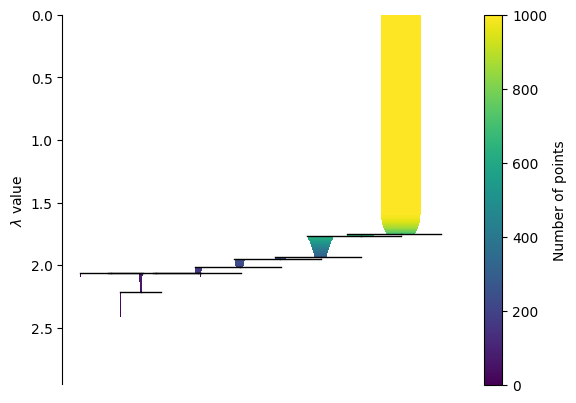

In [34]:
clusterer.condensed_tree_.plot()


<Axes: >

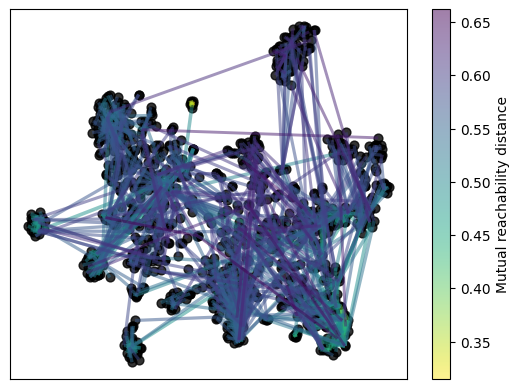

In [37]:
clusterer.minimum_spanning_tree_.plot()



In [49]:
print(clusterer.condensed_tree_.to_numpy())


[(1000,  604, 1.51074635,   1) (1000,  561, 1.51400437,   1)
 (1000,  595, 1.54692959,   1) (1000,  640, 1.54794209,   1)
 (1000,  753, 1.5616562 ,   1) (1000,  495, 1.56930767,   1)
 (1000,  485, 1.57249091,   1) (1000,  358, 1.57534982,   1)
 (1000,  683, 1.57764661,   1) (1000,  531, 1.58043606,   1)
 (1000,  496, 1.58356305,   1) (1000,  759, 1.58846192,   1)
 (1000,  694, 1.58988531,   1) (1000,  642, 1.59243242,   1)
 (1000,  575, 1.59616028,   1) (1000,  483, 1.59658808,   1)
 (1000,  475, 1.5975683 ,   1) (1000,  737, 1.60287496,   1)
 (1000,  680, 1.60313705,   1) (1000,  699, 1.61214626,   1)
 (1000,  704, 1.61241991,   1) (1000,  582, 1.61339649,   1)
 (1000,  785, 1.61357822,   1) (1000,  691, 1.61434217,   1)
 (1000,  945, 1.61553769,   1) (1000,  569, 1.61667715,   1)
 (1000,  349, 1.61697121,   1) (1000,  801, 1.62068864,   1)
 (1000,  417, 1.62083778,   1) (1000,  497, 1.62104921,   1)
 (1000,  572, 1.6218464 ,   1) (1000,  254, 1.62297351,   1)
 (1000,  331, 1.62614359

In [50]:
ctree = clusterer.condensed_tree_.to_numpy()

noteone = [ node for node in ctree if node[3] != 1]
print(len(ctree), len(noteone))


[(1000, 1001, 1.75005185, 707), (1000, 1002, 1.75005185, 8), (1001, 1003, 1.76645015, 663), (1001, 1004, 1.76645015, 5), (1003, 1005, 1.93821048, 278), (1003, 1006, 1.93821048, 11), (1005, 1007, 1.95291067, 254), (1005, 1008, 1.95291067, 5), (1007, 1009, 2.0143368, 187), (1007, 1010, 2.0143368, 7), (1009, 1011, 2.05859388, 136), (1009, 1012, 2.05859388, 9), (1011, 1013, 2.0643219, 117), (1011, 1014, 2.0643219, 16), (1013, 1015, 2.06492253, 20), (1013, 1016, 2.06492253, 95), (1016, 1017, 2.21156604, 39), (1016, 1018, 2.21156604, 6)]
